# Marketing Analysis - Performance of Ads Campaigns and A/B Test

From a specific dataset it was proposed to figure out wich campaigns performed better, so the company can increase their investment and consequently become profiter.

I'll work with the features provided in the dataset. I'm expecting to find some pattern between platform, experimental group and days in wich campaigns were running.

In [85]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [28]:
data_path = os.path.abspath('..\databases\csv_file')
data_file = 'ad_clicks.csv'
data_path_file = '\\'.join([data_path, data_file])

In [29]:
df_ads = pd.read_csv(data_path_file)

Knowing the first few rows of the dataset

In [30]:
df_ads.head()

user_id utm_source           day  \
0  008b7c6c-7272-471e-b90e-930d548bd8d7     google  6 - Saturday   
1  009abb94-5e14-4b6c-bb1c-4f4df7aa7557   facebook    7 - Sunday   
2  00f5d532-ed58-4570-b6d2-768df5f41aed    twitter   2 - Tuesday   
3  011adc64-0f44-4fd9-a0bb-f1506d2ad439     google   2 - Tuesday   
4  012137e6-7ae7-4649-af68-205b4702169c   facebook    7 - Sunday   

  ad_click_timestamp experimental_group  
0               7:18                  A  
1                NaN                  B  
2                NaN                  A  
3                NaN                  B  
4                NaN                  B

Let's see now the columns datatype and check if ad_click_timestamp is the only column that have NaN values

In [31]:
df_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             1654 non-null   object
 1   utm_source          1654 non-null   object
 2   day                 1654 non-null   object
 3   ad_click_timestamp  565 non-null    object
 4   experimental_group  1654 non-null   object
dtypes: object(5)
memory usage: 32.4+ KB


In [32]:
df_ads.isna().sum()

user_id                  0
utm_source               0
day                      0
ad_click_timestamp    1089
experimental_group       0
dtype: int64

In [33]:
df_ads[df_ads.isnull().any(axis=1)].head()

user_id utm_source          day  \
1  009abb94-5e14-4b6c-bb1c-4f4df7aa7557   facebook   7 - Sunday   
2  00f5d532-ed58-4570-b6d2-768df5f41aed    twitter  2 - Tuesday   
3  011adc64-0f44-4fd9-a0bb-f1506d2ad439     google  2 - Tuesday   
4  012137e6-7ae7-4649-af68-205b4702169c   facebook   7 - Sunday   
5  013b0072-7b72-40e7-b698-98b4d0c9967f   facebook   1 - Monday   

  ad_click_timestamp experimental_group  
1                NaN                  B  
2                NaN                  A  
3                NaN                  B  
4                NaN                  B  
5                NaN                  A

hmmmm.... my thoughts were right. Just the column ad_click_timestamp as NaN values. It's because there are many ads that didn't receive a click. So let's push aside for a while and analyse utm_source

# Wich platform has obtained more Views?

Throughtout the columns analysis it've benn possible to identify utm_source as the source of views to each ad.
Now I want to know which ad is performing better (e.g.g which source has obtained more views)

In [34]:
platforms_views = df_ads.groupby('utm_source').user_id.count().\
reset_index()
platforms_views = platforms_views.rename(columns={'user_id': 'views'})
sorted_platforms_views = platforms_views.sort_values(by='views', ascending=False)
sorted_platforms_views

utm_source  views
2     google    680
1   facebook    504
0      email    255
3    twitter    215

Above I've printed all views received for each platform sorted by the platform who had obtained the better performance

AxesSubplot(0.125,0.125;0.775x0.755)


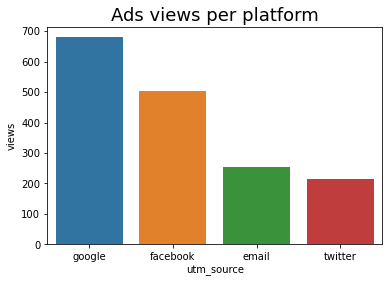

In [35]:
plt.title('Ads views per platform', fontsize=18)
print(sns.barplot(x=sorted_platforms_views['utm_source'], y=sorted_platforms_views['views']))

Now let's explore the other columns of our dataset and try to find out wich platform has a truly better performance. That's because, many views don't, necessarily, tell us whether a platform is getting more conversion in sales or not. So, let's dive in!

In [36]:
df_ads.columns

Index(['user_id', 'utm_source', 'day', 'ad_click_timestamp',
       'experimental_group'],
      dtype='object')

The column 'ad_click_time' seems interesting right now. What could we discover with it? Let's check how many ads were clicked.

In [37]:
#Total of rows
total_rows = len(df_ads['ad_click_timestamp'])
tt_clicked = df_ads['ad_click_timestamp'].count()
tt_non_clicked = df_ads[df_ads['ad_click_timestamp'].isna()].user_id.count()
print('Total of rows: ', total_rows )
print('Total of clicked ads: ', tt_clicked )
print('Total of non clicked ads: ', tt_non_clicked)

Total of rows:  1654
Total of clicked ads:  565
Total of non clicked ads:  1089


There are a lot of non clicked ads. I want to find out the difference in percentage

In [191]:
print('Total of clicked ads {0:,.2f}%'.format((tt_clicked/total_rows)*100))
print('Total of non clicked ads {0:,.2f}%'.format((tt_non_clicked/total_rows)*100))

Total of clicked ads 34.16%
Total of non clicked ads 65.84%


It's commom that in marketing campaigns there are more non clicked ads than clicked ads. So we have to frequently analyse the data to get insights of how can we improve that.

Now I'm going to create a new column to store the clicked and non clicked ad. Values will be set as  True or False

In [95]:
df_ads['is_click'] = ~df_ads['ad_click_timestamp'].isnull()

I'll check my new column

In [96]:
df_ads.head()

user_id utm_source           day  \
0  008b7c6c-7272-471e-b90e-930d548bd8d7     google  6 - Saturday   
1  009abb94-5e14-4b6c-bb1c-4f4df7aa7557   facebook    7 - Sunday   
2  00f5d532-ed58-4570-b6d2-768df5f41aed    twitter   2 - Tuesday   
3  011adc64-0f44-4fd9-a0bb-f1506d2ad439     google   2 - Tuesday   
4  012137e6-7ae7-4649-af68-205b4702169c   facebook    7 - Sunday   

  ad_click_timestamp experimental_group  is_click  
0               7:18                  A      True  
1                NaN                  B     False  
2                NaN                  A     False  
3                NaN                  B     False  
4                NaN                  B     False

Another way to exhibit the percent of people who clicked on ads. This time, from each utm_source

First let's groupby 'utm_source' and 'is_click' columns and count them

In [105]:
clicks_by_source = df_ads.groupby(['utm_source', 'is_click']).count().reset_index()

In [117]:
clicks_by_source.rename(columns={'user_id': 'count'}, inplace=True)
clicks_by_source

utm_source  is_click  count  day  ad_click_timestamp  experimental_group
0      email     False    175  175                   0                 175
1      email      True     80   80                  80                  80
2   facebook     False    324  324                   0                 324
3   facebook      True    180  180                 180                 180
4     google     False    441  441                   0                 441
5     google      True    239  239                 239                 239
6    twitter     False    149  149                   0                 149
7    twitter      True     66   66                  66                  66

In a second step, let's pivot the data

In [120]:
clicks_pivot = clicks_by_source.pivot(index='utm_source', columns='is_click', values='count').reset_index()
clicks_pivot

is_click utm_source  False  True
0             email    175    80
1          facebook    324   180
2            google    441   239
3           twitter    149    66

That's is much better. Now I'll create a new column called percent_clicked

In [125]:
clicks_pivot['percent_clicked'] = clicks_pivot[True] \
/ (clicks_pivot[True] + clicks_pivot[False])

In [134]:
def format_percent(x):
    return "{0:,.2f}%".format(x*100)
    
clicks_pivot['% clicked'] = clicks_pivot['percent_clicked'].apply(format_percent)

In [142]:
clicks_pivot = clicks_pivot.sort_values(by='percent_clicked', ascending=False)

# Wich platform has obtained more clicks?

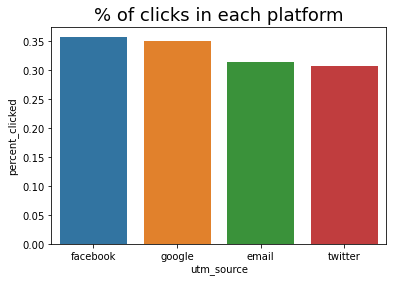

In [187]:
plt.title('% of clicks in each platform', fontsize=18)
sns.barplot(x='utm_source',y='percent_clicked', data=clicks_pivot)

According to 'Ads View per Platform', Google had had more views than other platforms. Despite that the conversion click rate of Facebook seems a bit higher.
Let's go deeper inside on these two platforms!

In [188]:
compare_platforms = ['facebook', 'google']
clicks_fb_google = \
clicks_pivot[clicks_pivot['utm_source'].isin(compare_platforms)][:]

In [189]:
clicks_fb_google['total_views'] = clicks_fb_google[True] \
+ clicks_fb_google[False]
clicks_fb_google = clicks_fb_google.sort_values\
(by='total_views', ascending=False)

In [190]:
clicks_fb_google

is_click utm_source  False  True  percent_clicked % clicked  total_views
2            google    441   239         0.351471    35.15%          680
1          facebook    324   180         0.357143    35.71%          504

Here I can prove my point!

user_id utm_source            day  \
0     008b7c6c-7272-471e-b90e-930d548bd8d7     google   6 - Saturday   
1     009abb94-5e14-4b6c-bb1c-4f4df7aa7557   facebook     7 - Sunday   
2     00f5d532-ed58-4570-b6d2-768df5f41aed    twitter    2 - Tuesday   
3     011adc64-0f44-4fd9-a0bb-f1506d2ad439     google    2 - Tuesday   
4     012137e6-7ae7-4649-af68-205b4702169c   facebook     7 - Sunday   
...                                    ...        ...            ...   
1649  fe8b5236-78f6-4192-9da6-a76bba67cfe6    twitter     7 - Sunday   
1650  fed3db6d-8c92-40e3-a4fb-1fb9d7337eb1   facebook     5 - Friday   
1651  ff3a22ff-521c-478c-87ca-7dc7b8f34372    twitter  3 - Wednesday   
1652  ff3af0d6-b092-4c4d-9f2e-2bdd8f7c0732     google     1 - Monday   
1653  ffdfe7ec-0c74-4623-8d90-d95d80f1ba34   facebook   6 - Saturday   

     ad_click_timestamp experimental_group  is_click  
0                  7:18                  A      True  
1                   NaN                  B     False  
2                   NaN                  A     False  
3                   NaN                  B     False  
4                   NaN                  B     False  
...                 ...                ...       ...  
1649                NaN                  A     False  
1650                NaN                  B     False  
1651                NaN                  B     False  
1652              22:57                  A      True  
1653                NaN                  B     False  

[1654 rows x 6 columns]

# Analyzing an A/B Test
Wich Ads group performed better?

In [200]:
df_ads.groupby('experimental_group').user_id.count().reset_index()


experimental_group  user_id
0                  A      827
1                  B      827

hmmm... in an interesting way we have exactly the same number of clicks for both ads group

Let's check the number of clicks for each ads we have

In [212]:
df_ads.groupby('experimental_group').is_click.sum().reset_index()

experimental_group  is_click
0                  A     310.0
1                  B     255.0

Another way we could see this information

In [218]:
grouped_ads = df_ads.groupby(['experimental_group', 'is_click']).user_id.count().reset_index()
pivoted_group = grouped_ads.pivot(index='experimental_group', columns='is_click', values='user_id').reset_index()
pivoted_group

is_click experimental_group  False  True
0                         A    517   310
1                         B    572   255

It seems that ads group A performed better than ads group B. Let's confirm that through the percentage of clicks.

In [225]:
pivoted_group['ctr'] = pivoted_group[True] / (pivoted_group[False]\
+ pivoted_group[True])

In [226]:
pivoted_group

is_click experimental_group  False  True  performance       ctr
0                         A    517   310     0.374849  0.374849
1                         B    572   255     0.308343  0.308343

In [230]:
pivoted_group['ctr (%)'] = pivoted_group['ctr'].apply(lambda x: '{:,.2f}%'.format(x*100))

In [231]:
pivoted_group

is_click experimental_group  False  True  performance       ctr ctr (%)
0                         A    517   310     0.374849  0.374849  37.48%
1                         B    572   255     0.308343  0.308343  30.83%

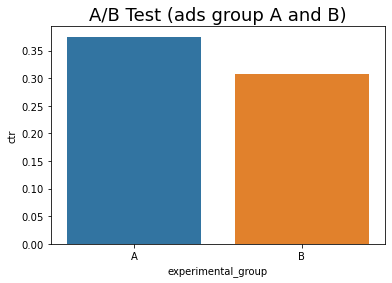

In [233]:
plt.title('A/B Test (ads group A and B)', fontsize=18)
sns.barplot(x='experimental_group', y='ctr', data=pivoted_group)

Ads group A trully performed better than B. So the best choice for the company is to increase their investiment in ads group A if they want to become profiter.

Soon I'll check if the clicks have changed by day of the week and explore wich platform performed better in each group of ads